# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('SINASC_RO_2019.csv', sep=',', decimal=',')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] < 4), 'apgar_5'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] < 6), 'apgar_5'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] < 8), 'apgar_5'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'apgar_5'] = 'normal'

df[['APGAR5', 'apgar_5']]

,APGAR5,apgar_5
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
...,...,...
27023,9.0,normal
27024,9.0,normal
27025,10.0,normal
27026,9.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

SEXO    Feminino  Masculino
APGAR5                     
0.0            9          8
1.0           15          9
2.0            9          8
3.0            7          8
4.0           11         12
5.0           21         24
6.0           35         43
7.0          106        135
8.0          911       1083
9.0         7863       8212
10.0        4103       4289
APGAR5
0.0        17
1.0        24
2.0        17
3.0        15
4.0        23
5.0        45
6.0        78
7.0       241
8.0      1994
9.0     16075
10.0     8392
dtype: int64
SEXO    Feminino  Masculino
APGAR5                     
0.0     0.529412   0.470588
1.0     0.625000   0.375000
2.0     0.529412   0.470588
3.0     0.466667   0.533333
4.0     0.478261   0.521739
5.0     0.466667   0.533333
6.0     0.448718   0.551282
7.0     0.439834   0.560166
8.0     0.456871   0.543129
9.0     0.489145   0.510855
10.0    0.488918   0.511082


<AxesSubplot:xlabel='APGAR5'>

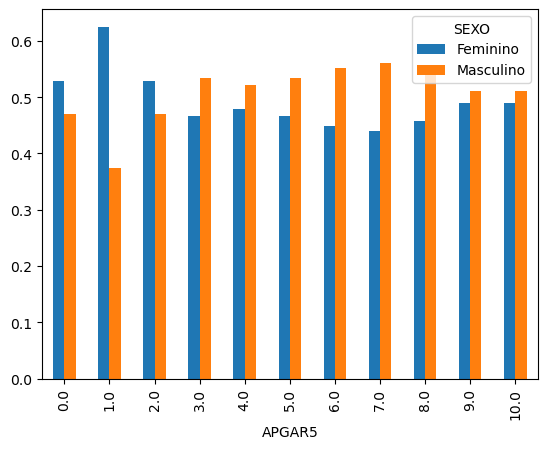

In [8]:
freq = pd.crosstab(df['APGAR5'], df['SEXO'])
print(freq)
print(freq.sum(1))

freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

freq_pctlin.plot.bar()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

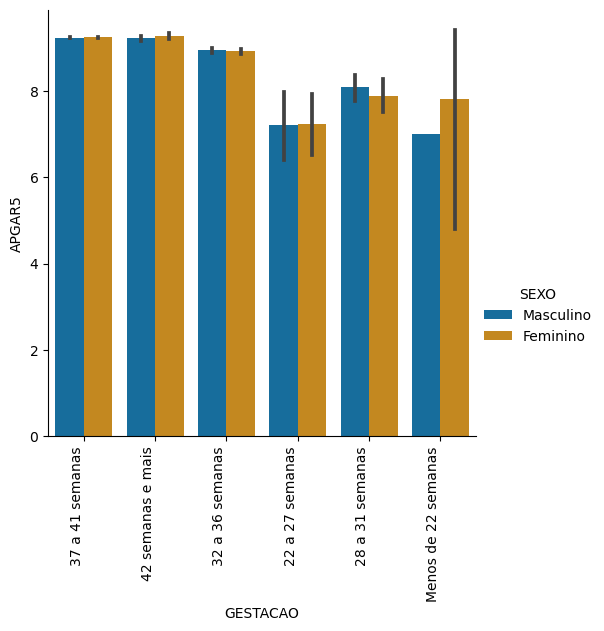

In [9]:
sns.catplot(x = 'GESTACAO',  #APGAR5 SEXO GESTACAO
            y = 'APGAR5',
            hue = 'SEXO',
            kind = 'bar',
            palette = 'colorblind',
            data = df[df.APGAR5 > 0]
           )
plt.xticks(rotation=90, horizontalalignment='right')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [10]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(freq)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

APGAR5                   0.0       1.0       2.0       3.0       4.0   \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   

APGAR5                   5.0       6.0       7.0       8.0       9.0   \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529   
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067  0.162041  0.585049   
37 a 41 semanas      0.000932  0.001998  0.006704 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [12]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

<AxesSubplot:xlabel='GESTACAO'>

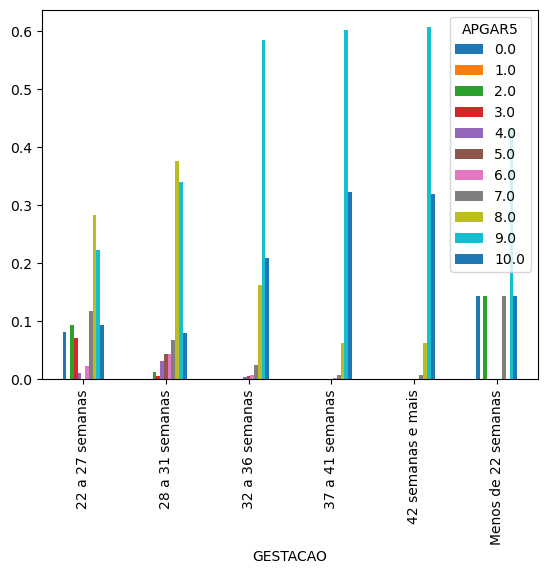

In [13]:
freq_pctlin.plot.bar()

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  
GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41

<AxesSubplot:xlabel='GESTACAO'>

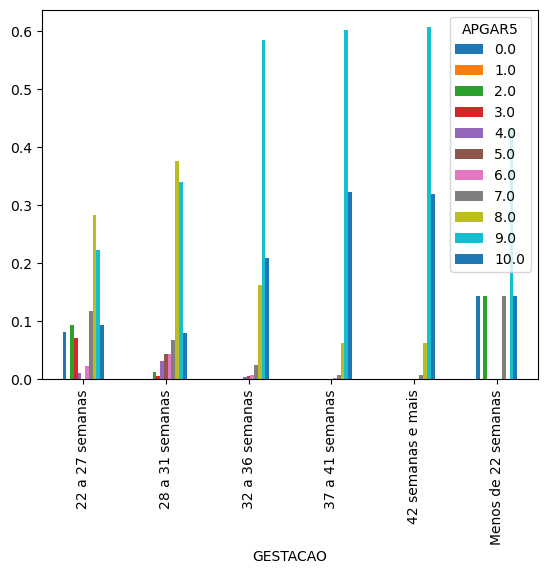

In [14]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(freq)
print(freq.sum(1))

freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

freq_pctlin.plot.bar()

   #### Parece que o conjunto de dados corrobora com a afirmação dos médicos. No grafico podemos ver que no normal fica entre 37 a 42 semanas, antes ou depois dessa data ja podemos ver diferencas nos dados. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

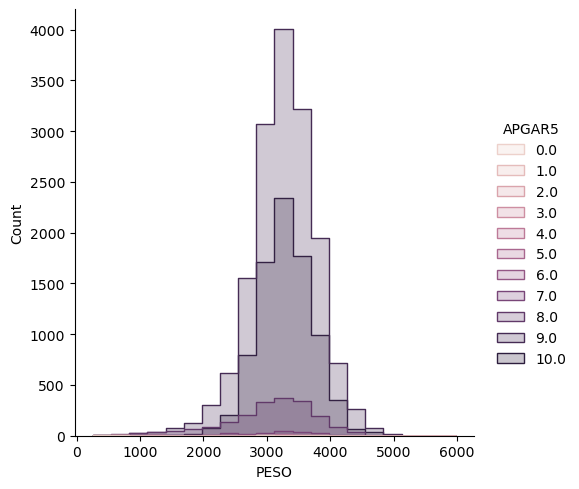

In [27]:
sns.displot(data = df
            ,alpha = .25
            ,x = 'PESO'
            ,hue = 'APGAR5'
            ,bins = 20
            ,element = 'step'
           )

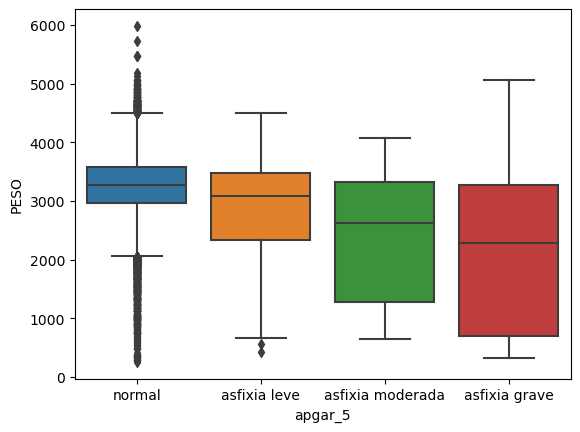

In [16]:
ax = sns.boxplot(data = df,
            y = 'PESO',            
            x = 'apgar_5',
            order = ['normal', 'asfixia leve', 'asfixia moderada', 'asfixia grave'],
            orient = None,
            )

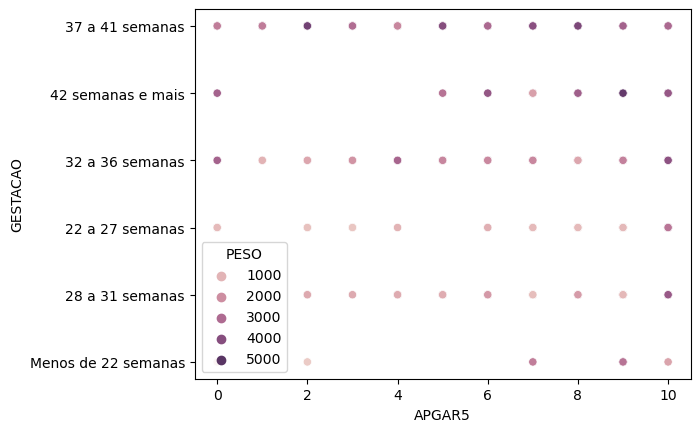

In [30]:
ax = sns.scatterplot(data = df, y = 'GESTACAO',x ='APGAR5',hue = 'PESO')